**Student : Arora, Sanjana (V00966221)**

**Question 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras.datasets
from keras.datasets import fashion_mnist
from sklearn.manifold import TSNE

**1.1** **Dataset**

In [2]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_X.shape

(60000, 28, 28)

In [4]:
train_Y.shape

(60000,)

In [5]:
test_X.shape

(10000, 28, 28)

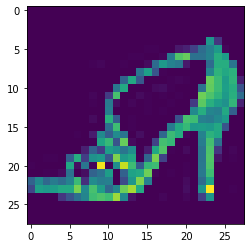

In [6]:
plt.imshow(train_X[8000])

In [7]:
# the number of classes
unique_label = np.unique(train_Y)

Downsampling the dataset with each class having 500 data samples.

In [8]:
downsampled_data = np.zeros((0,28,28))
downsampled_data_Y = np.zeros(0)
for label in unique_label:
  
  #filtering the data for each class label and selecting the index
  data_filter = np.where(train_Y==label)[0]
  
  #applying the filter to obtain the class data
  train_XX, train_YY = train_X[data_filter], train_Y[data_filter]
  downsampled_data = np.concatenate((downsampled_data, train_XX[:500,:,:]), axis=0)
  downsampled_data_Y = np.concatenate((downsampled_data_Y,train_YY[:500]), axis=0)

In [9]:
downsampled_data.shape

(5000, 28, 28)

In [10]:
 downsampled_data_Y.shape

(5000,)

**1.2 PCA**

Data Preprocessing for converting mean = 0 and standard deviation =1

In [11]:
downsampled_reshapedata = np.reshape(downsampled_data, (downsampled_data.shape[0], 784)).astype("float32") / 255.

In [12]:
from sklearn.preprocessing import StandardScaler
processed_data = StandardScaler().fit_transform(downsampled_reshapedata)
print(processed_data.shape)

(5000, 784)


In [13]:
from sklearn.decomposition import PCA  

In [14]:
pca = PCA(n_components=5)
pca.fit(processed_data)
X_pca = pca.transform(processed_data)

In [15]:
print(pca.components_)

[[ 0.00089381  0.00133871  0.00124817 ...  0.00496008  0.00138302
   0.00089843]
 [-0.00048696  0.00284432  0.0031299  ...  0.01444759  0.0102634
   0.00547243]
 [ 0.00053212  0.00228065  0.00221301 ...  0.01132075  0.00141628
  -0.00164291]
 [ 0.00129308  0.00629581  0.0078171  ...  0.0452003   0.03400798
   0.01153875]
 [ 0.0040344   0.00677786  0.01019058 ...  0.00263603  0.00220691
   0.00444773]]


In [16]:
print(pca.explained_variance_)

[172.7524   114.23485   42.251022  40.694786  31.691492]


In [17]:
print(pca.explained_variance_ratio_)

[0.22030357 0.1456787  0.05388088 0.05189628 0.04041477]


**Plotting the top 5 components**

In [18]:
# function for plotting the PCA components

def component_plot(pca, component):
    component_data = (pca.components_[component]).reshape(28,28)  #reshape images
    plt.imshow(component_data); #plot the data
    plt.xticks([]) #remove numbered labels on x-axis
    plt.yticks([]) #remove numbered labels on y-axis   

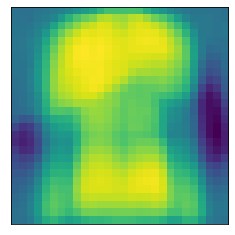

In [19]:
component_plot(pca, 0)

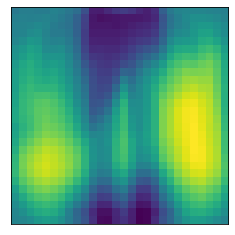

In [20]:
component_plot(pca, 1)

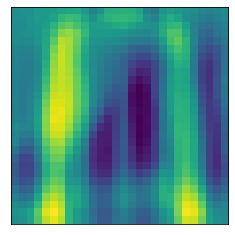

In [21]:
component_plot(pca, 2)

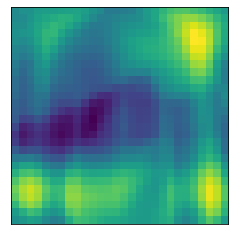

In [22]:
component_plot(pca, 3)

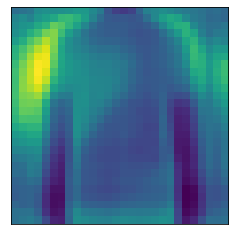

In [23]:
component_plot(pca, 4)

In [24]:
pca_varr = PCA(n_components=45)
pca_varr.fit(processed_data)
pca_varr_data = pca_varr.transform(processed_data)

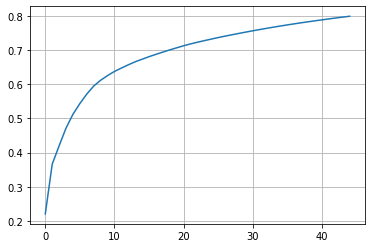

In [31]:
plt.plot(range(45), np.cumsum(pca_varr.explained_variance_ratio_))
plt.grid()

As observed in the plot above, approximately 45 components are needed to explain 80% of the variance. 

Plotting 3 examples to show data on projected on 45-Dimensional space and original image. Here, the original image is the image from the downsampled dataset and the projected image is the image received after performing the PCA.

([], <a list of 0 Text major ticklabel objects>)

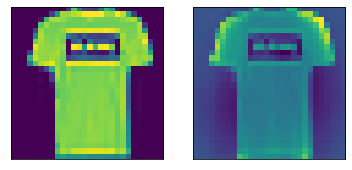

In [41]:
plt.subplot(1,2,1)
plt.imshow(downsampled_data[0,:].reshape(28,28))
plt.xticks([]) 
plt.yticks([])  
plt.subplot(1,2,2)
plt.imshow(processed_data[0,:].reshape(28,28))
plt.xticks([]) 
plt.yticks([]) 

([], <a list of 0 Text major ticklabel objects>)

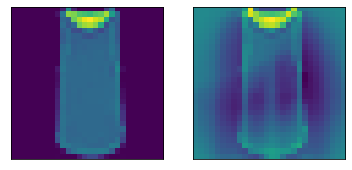

In [40]:
plt.subplot(1,2,1)
plt.imshow(downsampled_data[1,:].reshape(28,28))
plt.xticks([]) 
plt.yticks([]) 
plt.subplot(1,2,2)
plt.imshow(processed_data[1,:].reshape(28,28))
plt.xticks([]) 
plt.yticks([]) 

([], <a list of 0 Text major ticklabel objects>)

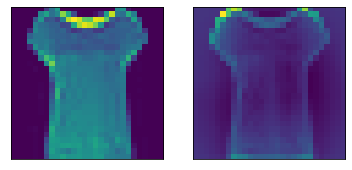

In [42]:
plt.subplot(1,2,1)
plt.imshow(downsampled_data[100,:].reshape(28,28))
plt.xticks([]) 
plt.yticks([]) 
plt.subplot(1,2,2)
plt.imshow(processed_data[100,:].reshape(28,28))
plt.xticks([]) 
plt.yticks([]) 

**1.3 Plot**

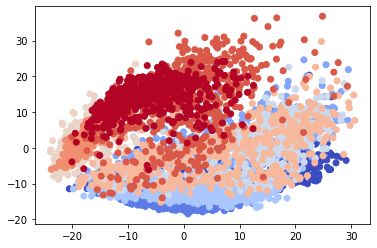

In [37]:
# labels are captured in the downsampled_data_Y
plt.scatter(pca_varr_data[:,0], pca_varr_data[:,1],c=downsampled_data_Y, cmap = 'coolwarm')
plt.show()

Looking at the scatterplot, it would be very difficult to distinguish between the classes without knowing the colours in advance.

**1.4 T-SNE**

In [38]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(processed_data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.436s...
[t-SNE] Computed neighbors for 5000 samples in 43.727s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 5.713721
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.915298
[t-SNE] KL divergence after 300 iterations: 1.883500


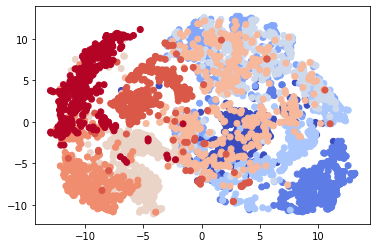

In [39]:
plt.scatter(tsne_results[:,0], tsne_results[:,1],c=downsampled_data_Y, cmap = 'coolwarm')
plt.show()

The scatterplot is more informative as compared to the scatterplot derived from PCA. The data from different labels looks quite separable from one another and someone can guess the different labels after looking at the scatterplot.